# 2주차 미션
- slagoon

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## Q1. 전국 시도별 약국수를 구해주세요!

- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
- 다음의 결과가 나오도록 구합니다.


In [3]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [15]:
df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

In [39]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [11]:
drugstore = df[df['상권업종소분류명']=='약국']

In [12]:
drugstore['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

In [14]:
drugstore.groupby('시도명').count()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
시도명,,,,,,,,,,,,,,,,,,,,,
강원도,729,729,9,729,729,729,729,729,729,729,...,729,175,729,729,729,46,263,65,729,729
경기도,4510,4510,119,4510,4510,4510,4510,4510,4510,4510,...,4510,2635,4510,4507,4509,536,1964,1417,4510,4510
경상남도,1017,1017,18,1017,1017,1017,1017,1017,1017,1017,...,1017,519,1017,1017,1017,58,342,179,1017,1017
경상북도,915,915,22,915,915,915,915,915,915,915,...,915,173,915,915,915,60,250,89,915,915
광주광역시,691,691,13,691,691,691,691,691,691,691,...,691,273,691,691,691,84,304,122,691,691
대구광역시,870,870,10,870,870,870,870,870,870,870,...,870,223,870,870,870,131,269,180,870,870
대전광역시,603,603,12,603,603,603,603,603,603,603,...,603,222,603,603,603,45,252,122,603,603
부산광역시,1130,1130,21,1130,1130,1130,1130,1130,1130,1130,...,1130,473,1130,1130,1130,184,429,203,1130,1130
서울특별시,3579,3579,67,3579,3579,3579,3579,3579,3579,3579,...,3579,2037,3579,3579,3579,342,2329,572,3579,3579


## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

In [17]:
pet = df[df['상권업종소분류명']=='동물병원']
pet.shape

(3098, 39)

In [21]:
pet['시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

In [22]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline

<AxesSubplot:xlabel='시도명', ylabel='count'>

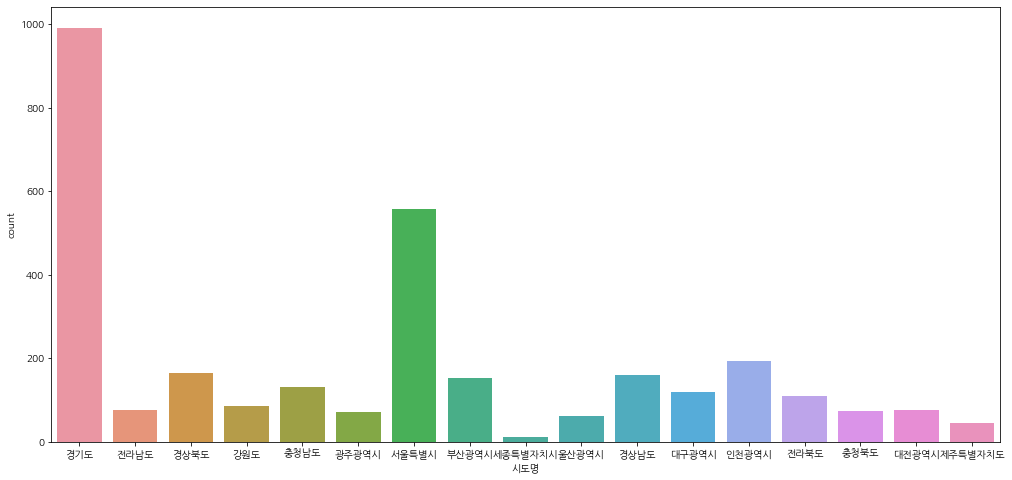

In [30]:
plt.figure(figsize=(17,8))
sns.countplot(data=pet, x='시도명')

In [34]:
df2 = df[(df['상권업종소분류명']=='동물병원')|(df['상권업종소분류명']=='병원')|(df['상권업종소분류명']=='약국')]
df2

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
5,20809147,행신동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4128112800106470014011094,NaN,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,NaN,1,NaN,126.831632,37.619309
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
12,21145534,목포동물병원,NaN,S,의료,S04,수의업,S04A02,동물병원,M73100,...,4611010200110500078000665,NaN,전라남도 목포시 영산로 200-1,530806.0,58708.0,NaN,1,NaN,126.390244,34.799439
15,21006553,상명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4713010800103400004022515,NaN,경상북도 경주시 금성로 281,780943.0,38156.0,NaN,1,NaN,129.206670,35.842804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,16131397,큰나무약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128110600107000011013834,신원당빌딩,경기도 고양시 덕양구 고양대로 1361,412807.0,10464.0,NaN,1,NaN,126.835684,37.655048
91321,16130841,복음약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,2729012400102760000029818,그린맨션3차아파트,대구광역시 달서구 구마로36길 33,704752.0,42735.0,301,NaN,105,128.547352,35.836250
91322,16091491,설연화한복감성약방,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010400101740001009985,NaN,서울특별시 중랑구 공릉로 28,131848.0,2034.0,NaN,NaN,NaN,127.078082,37.613194
91324,16109731,위례수약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4113110800101810002000002,NaN,경기도 성남시 수정구 위례서일로 18,461210.0,13647.0,NaN,1,NaN,127.137870,37.465260


<AxesSubplot:xlabel='시도명', ylabel='count'>

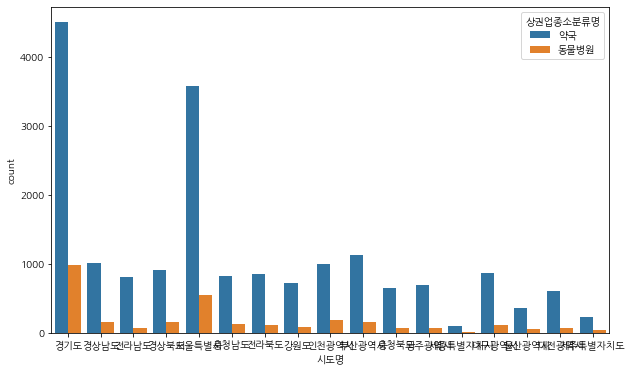

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2, x='시도명', hue='상권업종소분류명')

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요

In [64]:
df = pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding='cp949')
df_hospital = df[df['상권업종중분류명']=='병원']
df_hospital

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.170000e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.140000e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650000e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1.170000e+24,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4.0,NaN,127.028531,37.522223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91326,16130997,새삶의료선교,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,4.830000e+24,NaN,경상남도 김해시 분성로569번길 2,621917.0,50820.0,NaN,NaN,NaN,128.908380,35.236243
91328,16198812,서울플러스,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4.420000e+24,배방자이1차아파트,충청남도 아산시 배방읍 호서로 460,336729.0,31495.0,NaN,2.0,NaN,127.083401,36.768332
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.640000e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.170000e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993


In [65]:
df_seoul = df_hospital[df_hospital['시도명']=='서울특별시']
df_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.170000e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1.170000e+24,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4.0,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1.170000e+24,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3.0,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1.170000e+24,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3.0,NaN,127.126507,37.537333
41,20916395,이태형한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.140000e+24,브라운스톤중계,서울특별시 노원구 동일로203가길 29,139880.0,1779.0,NaN,2.0,NaN,127.064245,37.639918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91297,16109247,위례이사랑치과,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1.170000e+24,에스비트램스퀘어,서울특별시 송파구 위례광장로 200,138926.0,5849.0,NaN,NaN,504.0,127.142888,37.481200
91316,16108615,리엔장의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.140000e+24,삼양세븐스프링스,서울특별시 마포구 양화로18길 3,121818.0,4051.0,NaN,6.0,NaN,126.924553,37.557021
91318,16190911,동민피부과비뇨기과,NaN,S,의료,S01,병원,S01B12,비뇨기과,Q86201,...,1.120000e+24,미주아파트,서울특별시 동대문구 약령시로 147,130781.0,2489.0,NaN,NaN,NaN,127.045802,37.583788
91320,16131813,월계치과,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1.140000e+24,월계역신도브래뉴,서울특별시 노원구 월계로 338,139847.0,1885.0,NaN,2.0,201.0,127.057988,37.629326


In [66]:
df_seoul1 = df_seoul[df_seoul['상권업종소분류명'].str.contains('피부|성형')]
a = df_seoul1['시군구명'].value_counts().round(2)

In [67]:
b = df_seoul['시군구명'].value_counts()

In [70]:
(a/b).round(2).sort_values(ascending = False)

강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.

In [111]:
import folium

In [112]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [113]:
df_silver = df[df['상권업종소분류명']=='노인/치매병원']
df_silver.shape

(1055, 39)

In [114]:
df_silver['시도명'].value_counts()

경기도        210
부산광역시      113
경상북도       102
경상남도        87
서울특별시       83
전라북도        67
전라남도        65
충청남도        61
인천광역시       51
대구광역시       46
광주광역시       35
충청북도        32
대전광역시       31
강원도         31
울산광역시       23
제주특별자치도     10
세종특별자치시      4
Name: 시도명, dtype: int64

<AxesSubplot:xlabel='시도명', ylabel='count'>

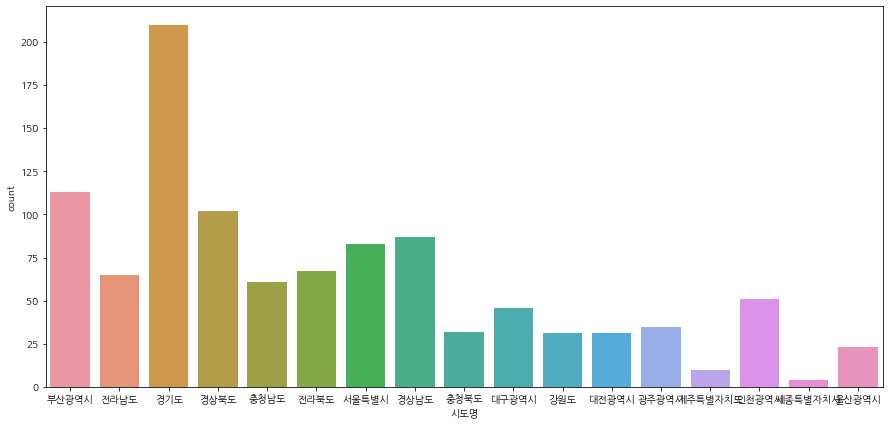

In [115]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_silver, x='시도명')

In [116]:
df_silver= df_silver.dropna(subset=['시도명'])

In [117]:
df_silver = df_silver.reset_index(drop=True)

In [118]:
df_silver.isnull().sum()

상가업소번호          0
상호명             0
지점명          1028
상권업종대분류코드       0
상권업종대분류명        0
상권업종중분류코드       0
상권업종중분류명        0
상권업종소분류코드       0
상권업종소분류명        0
표준산업분류코드        0
표준산업분류명         0
시도코드            0
시도명             0
시군구코드           0
시군구명            0
행정동코드           0
행정동명            0
법정동코드           0
법정동명            0
지번코드            0
대지구분코드          0
대지구분명           0
지번본번지           0
지번부번지         248
지번주소            0
도로명코드           0
도로명             0
건물본번지           0
건물부번지         854
건물관리번호          0
건물명           478
도로명주소           0
구우편번호           0
신우편번호           0
동정보          1008
층정보           591
호정보           970
경도              0
위도              0
dtype: int64

In [127]:
df_silver.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [130]:
a = df_silver['위도'].mean()
b = df_silver['경도'].mean()
m = folium.Map(location=[a,b], zoom_start=10)

In [131]:
for i in df_silver.index:
    name = df_silver.loc[i,'상호명']
    location = [df_silver.loc[i,'위도'],df_silver.loc[i,'경도']]
    address = df_silver.loc[i,'도로명주소']
    popup = f"{name} - {address}"

     
    if df_silver['시도명'][i] =='서울특별시':
        folium.Marker(
            location = location,
            popup=popup,
            icon=folium.Icon(color = 'blue')).add_to(m)
    elif df_silver['시도명'][i] =='경기도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'white')
        ).add_to(m)
    elif df_silver['시도명'][i] =='부산광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'green')
        ).add_to(m)
    elif df_silver['시도명'][i] =='경상북도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'red')).add_to(m)
    elif df_silver['시도명'][i] =='경상남도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'purple')).add_to(m)
    elif df_silver['시도명'][i] =='전라북도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'orange')).add_to(m)
    elif df_silver['시도명'][i] =='전라남도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'darkred')).add_to(m)
    elif df_silver['시도명'][i] =='충청남도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'black')).add_to(m)
    elif df_silver['시도명'][i] =='대구광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'gray')).add_to(m)
    elif df_silver['시도명'][i] =='인천광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'lightgreen')).add_to(m)
    elif df_silver['시도명'][i] =='광주광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'lightblue')).add_to(m)
    elif df_silver['시도명'][i] =='충청북도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'pink')).add_to(m)
    elif df_silver['시도명'][i] =='강원도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'darkpurple')).add_to(m)
    elif df_silver['시도명'][i] =='대전광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'cadetblue')).add_to(m)
    elif df_silver['시도명'][i] =='울산광역시':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'darkgreen')).add_to(m)
    elif df_silver['시도명'][i] =='제주특별자치도':
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'darkblue')).add_to(m)
    else:
        folium.Marker(
        location = location,
        popup=popup,
        icon=folium.Icon(color = 'beige')).add_to(m)
m
    